Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as smt
import warnings
warnings.simplefilter('ignore')

In [ ]:
import tensorflow as tf
import random

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# Data-Loading

In [36]:
train = pd.read_csv('UnderemploymentRate_InSample.csv')
print(train.shape)
train.head()

(475, 2)


,Date,Underemployment Rate
0,1/06/1978,4.270054
1,1/07/1978,3.933794
2,1/08/1978,4.045333
3,1/09/1978,3.999336
4,1/10/1978,3.722322


In [37]:
train ['Date'] = pd.to_datetime(train['Date'], dayfirst= True) # put day and month in the normal order
train ['Date']

0     1978-06-01
1     1978-07-01
2     1978-08-01
3     1978-09-01
4     1978-10-01
         ...    
470   2017-08-01
471   2017-09-01
472   2017-10-01
473   2017-11-01
474   2017-12-01
Name: Date, Length: 475, dtype: datetime64[ns]

In [38]:
train.set_index('Date',inplace = True) #replace index by Date column
train.head()

,Underemployment Rate
Date,
1978-06-01,4.270054
1978-07-01,3.933794
1978-08-01,4.045333
1978-09-01,3.999336
1978-10-01,3.722322


In [39]:
test = pd.read_csv('UnderemploymentRate_OutofSample.csv')
print(test.shape)
test.head()

(24, 2)


,Date,Underemployment Rate
0,1/01/2018,4.614745
1,1/02/2018,4.524650
2,1/03/2018,4.441512
3,1/04/2018,4.349381
4,1/05/2018,4.293985


In [40]:
test ['Date'] = pd.to_datetime(test['Date'], dayfirst= True) # put day and month in the normal order
test ['Date']

0    2018-01-01
1    2018-02-01
2    2018-03-01
3    2018-04-01
4    2018-05-01
5    2018-06-01
6    2018-07-01
7    2018-08-01
8    2018-09-01
9    2018-10-01
10   2018-11-01
11   2018-12-01
12   2019-01-01
13   2019-02-01
14   2019-03-01
15   2019-04-01
16   2019-05-01
17   2019-06-01
18   2019-07-01
19   2019-08-01
20   2019-09-01
21   2019-10-01
22   2019-11-01
23   2019-12-01
Name: Date, dtype: datetime64[ns]

In [41]:
test.set_index('Date',inplace = True) #replace index by Date column
test.head()

,Underemployment Rate
Date,
2018-01-01,4.614745
2018-02-01,4.524650
2018-03-01,4.441512
2018-04-01,4.349381
2018-05-01,4.293985


In [42]:
test.shape

(24, 1)

In [43]:
train.head()

,Underemployment Rate
Date,
1978-06-01,4.270054
1978-07-01,3.933794
1978-08-01,4.045333
1978-09-01,3.999336
1978-10-01,3.722322


In [44]:
test.head()

,Underemployment Rate
Date,
2018-01-01,4.614745
2018-02-01,4.524650
2018-03-01,4.441512
2018-04-01,4.349381
2018-05-01,4.293985


In [45]:
type(train)

pandas.core.frame.DataFrame

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 475 entries, 1978-06-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Underemployment Rate  475 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [47]:
train.describe()

,Underemployment Rate
count,475.000000
mean,5.217498
std,1.386199
min,3.039488
25%,4.093242
50%,4.887481
75%,6.137266
max,9.506796


In [48]:
#missing values
train.isnull().values.any()

False

#  EDA

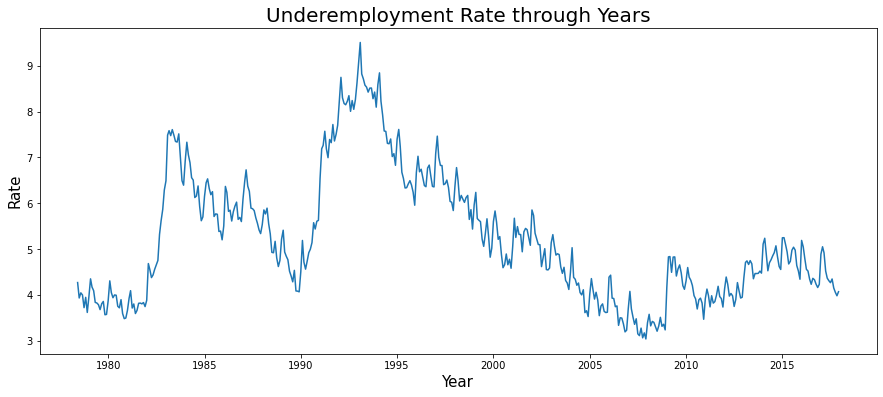

In [49]:
plt.figure(figsize= (15, 6))
plt.plot(train['Underemployment Rate'])
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Rate',fontsize = 15)
plt.title('Underemployment Rate through Years', fontsize = 20)
plt.show()

## CMA

In [50]:
# picking for the most fit CMA
CMA_3 = train.rolling(3,center= True).mean()
CMA_6 = train.rolling(6,center= True).mean().rolling(2,center= True).mean().shift(-1)
CMA_12 = train.rolling(12,center= True).mean().rolling(2,center= True).mean().shift(-1)

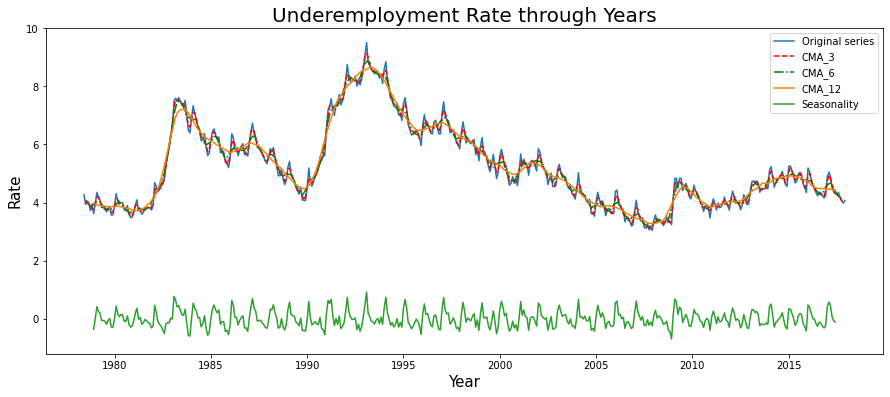

In [51]:
# plot for comparison
plt.figure(figsize= (15, 6))
plt.plot(train, label = 'Original series')
plt.plot(CMA_3,'--r', label = 'CMA_3')
plt.plot(CMA_6,'-.g',label = 'CMA_6')
plt.plot(CMA_12, label = 'CMA_12')

plt.xlabel('Year',fontsize = 15)
plt.ylabel('Rate',fontsize = 15)
plt.title('Underemployment Rate through Years', fontsize = 20)


#remove trend 
initial_trend = CMA_12
detrend_a = train - initial_trend
plt.plot(detrend_a, label = 'Seasonality')
plt.legend()
plt.show()

## ACF and PACF


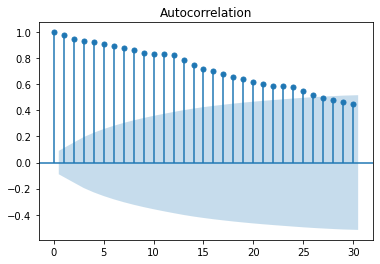

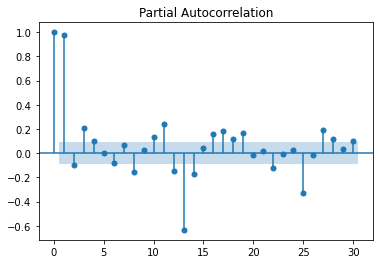

In [52]:
smt. graphics.tsa.plot_acf(train, lags= 30, alpha = 0.05)
smt. graphics.tsa.plot_pacf(train, lags= 30, alpha = 0.05)
plt.show()

# Data Processing

In [53]:
train_un = train['Underemployment Rate'] #training data for underemployment
train = train_un[: -24] # split train data into train and validation
val = train_un [-24:] #remaning 24 months(2 years) for validation

In [54]:
train.shape # not exactly 37 or 38 years months

(451,)

In [55]:
train # months started from June and end of December, not exactly in years

Date
1978-06-01    4.270054
1978-07-01    3.933794
1978-08-01    4.045333
1978-09-01    3.999336
1978-10-01    3.722322
                ...   
2015-08-01    5.041716
2015-09-01    4.978493
2015-10-01    4.641537
2015-11-01    4.521249
2015-12-01    4.342298
Name: Underemployment Rate, Length: 451, dtype: float64

In [56]:
train_new = train[7:] # cut off the date from 1978 year (incompleted)

In [57]:
train_new # total 37 years

Date
1979-01-01    3.962852
1979-02-01    4.351050
1979-03-01    4.171866
1979-04-01    4.092224
1979-05-01    3.837195
                ...   
2015-08-01    5.041716
2015-09-01    4.978493
2015-10-01    4.641537
2015-11-01    4.521249
2015-12-01    4.342298
Name: Underemployment Rate, Length: 444, dtype: float64

In [58]:
test.shape

(24, 1)

In [59]:
val.shape # match with test

(24,)

In [60]:
val

Date
2016-01-01    5.189380
2016-02-01    5.047139
2016-03-01    4.798441
2016-04-01    4.559056
2016-05-01    4.520671
2016-06-01    4.343193
2016-07-01    4.232351
2016-08-01    4.362523
2016-09-01    4.330350
2016-10-01    4.234881
2016-11-01    4.162273
2016-12-01    4.231475
2017-01-01    4.887481
2017-02-01    5.050924
2017-03-01    4.919213
2017-04-01    4.520863
2017-05-01    4.366042
2017-06-01    4.309910
2017-07-01    4.267353
2017-08-01    4.348083
2017-09-01    4.152602
2017-10-01    4.058758
2017-11-01    3.982008
2017-12-01    4.070490
Name: Underemployment Rate, dtype: float64

In [61]:
#detrend 
CMA_12_new = train_new.rolling(12,center= True).mean().rolling(2,center= True).mean().shift(-1) #CMA_12 shows the best fit at the EDA step
detrend_b = train_new - CMA_12_new

In [62]:
detrend_b

Date
1979-01-01   NaN
1979-02-01   NaN
1979-03-01   NaN
1979-04-01   NaN
1979-05-01   NaN
              ..
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Name: Underemployment Rate, Length: 444, dtype: float64

In [63]:
train_new_res_zero = np.nan_to_num(detrend_b) #replace missing values in the train_new by zeros

# reshape the detrended series to a table 
# A column contains data in a particular month of 37 years.
monthly_S = np.reshape(train_new_res_zero,(37,12)) #37 years and 12 months

In [64]:
monthly_S # zero exist [1:36] to avid incomplete zeros

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.56282731e-02, -1.87203344e-01, -5.12927888e-02,
         8.98166513e-03, -2.81475826e-01, -2.87570736e-01],
       [ 3.81800900e-03,  4.38148878e-01,  1.78336411e-01,
         7.26642275e-02,  1.47104721e-01,  1.48119949e-01,
        -8.04549702e-02, -9.06310034e-02,  1.02123448e-01,
        -1.93015023e-01, -2.86633274e-01, -2.48932954e-01],
       [-6.00584160e-02,  2.03065659e-01,  3.67255332e-01,
        -1.72456609e-02,  4.82993678e-02, -1.85754214e-01,
        -1.37431091e-01, -2.26571223e-02, -6.81374093e-02,
        -1.32133114e-01, -1.58050630e-01, -3.12619423e-01],
       [-2.56803385e-01,  4.64667185e-01,  2.34164499e-01,
        -8.06494240e-02, -1.84314468e-01, -2.51468916e-01,
        -3.74009267e-01, -4.97428878e-01, -1.72651432e-01,
        -1.29543839e-01, -1.42523347e-01,  2.57924137e-02],
       [-9.01025338e-03,  7.69149044e-01,  6.6714201

In [65]:
#Calculate column average
monthly_avg = np.mean(monthly_S[1:36], axis=0) #out of zero values

In [66]:
monthly_avg

array([ 0.15097381,  0.53206844,  0.271789  ,  0.10783041,  0.06730568,
       -0.03397022, -0.18516627, -0.1197951 ,  0.02687172, -0.21756595,
       -0.26915879, -0.33185275])

In [67]:
#Normalized the seational index
seasonal_index = monthly_avg.mean()
seasonal_index_normalized = monthly_avg - seasonal_index

#seasonal component
seasonal = np.tile(seasonal_index_normalized, 37) # 12 times 37
seasonally_adjusted = train_new - seasonal

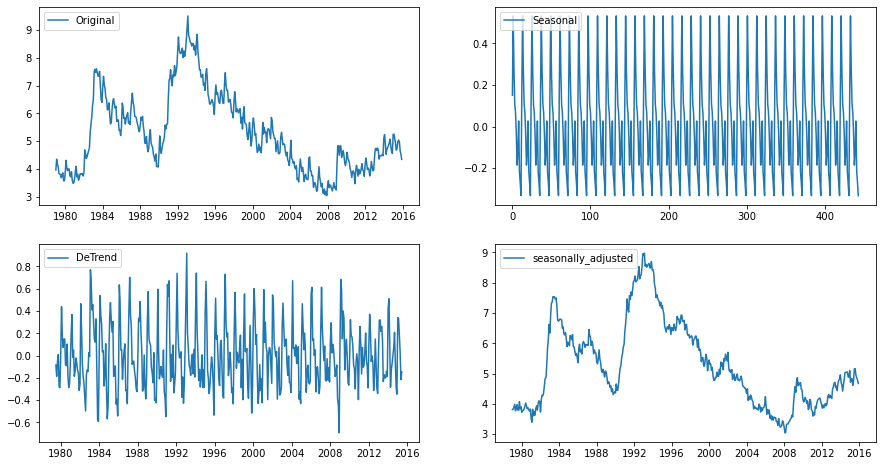

In [69]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
ax[0,0].plot(train_new)
ax[1,0].plot(detrend_b)
ax[0,1].plot(seasonal)
ax[1,1].plot(seasonally_adjusted)
ax[0,0].legend(['Original'], loc=2)
ax[1,0].legend(['DeTrend'], loc=2)
ax[0,1].legend(['Seasonal'], loc=2)
ax[1,1].legend(['seasonally_adjusted'], loc=2)
plt.show()

# Modeling

## Decomposition

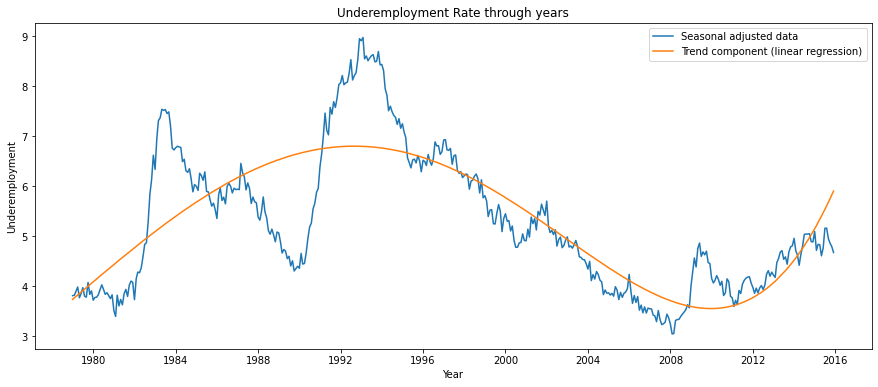

In [ ]:
from sklearn.linear_model import LinearRegression 

# Prepare training data
X = np.linspace(1, len(seasonally_adjusted), len(seasonally_adjusted))
X = np.reshape(X, (len(seasonally_adjusted), 1))
X = np.hstack(( X, X**3, X**5 ))
y = seasonally_adjusted.values    

lm = LinearRegression()   


lm.fit(X, y)


X_fitting = np.reshape(np.arange(1,len(seasonally_adjusted)+1), (len(seasonally_adjusted),1))
X_fitting = np.hstack((X_fitting,X_fitting**3,X_fitting**5))
trend_linear = lm.predict(X_fitting)


plt.figure(figsize=(15,6))
plt.plot(train_new.index,seasonally_adjusted)
plt.plot(train_new.index,trend_linear)
plt.title('Underemployment Rate through years')
plt.xlabel('Year')
plt.ylabel('Underemployment')
plt.legend(['Seasonal adjusted data','Trend component (linear regression)'])
plt.show()

In [ ]:
len(train_new)+1

445

In [ ]:
len(train_new)+25

469

In [ ]:
time_val = np.arange(len(train_new)+1,len(train_new)+25).reshape(-1,1)
time_valid = np.hstack((time_val, time_val**3, time_val**5))
#trend component forecast 
trend_pred = lm.predict(time_valid)
#seasonal component forecast
seasonal_pred = np.tile(seasonal_index_normalized, 2)
#decomposition component forecast
decomposition_pred = trend_pred - seasonal_pred
decomposition_pred

array([5.82899934, 5.52710964, 5.86819759, 6.11458427, 6.23917272,
       6.42616414, 6.6647437 , 6.68844037, 6.63254211, 6.96946554,
       7.1152779 , 7.27394181, 6.88885235, 6.60727878, 6.96888016,
       7.23597855, 7.38147801, 7.58958076, 7.849473  , 7.89468469,
       7.86050484, 8.21935108, 8.38729168, 8.56829028])

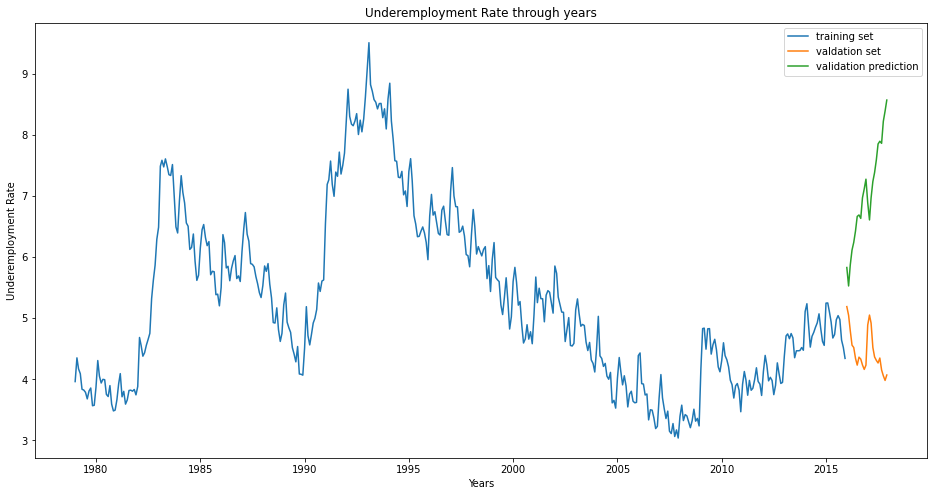

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_new, label='training set')
plt.plot(val, label = "valdation set")
plt.plot(val.index,decomposition_pred, label = "validation prediction")
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.title("Underemployment Rate through years")
plt.legend()
plt.show() 

#prediction(green part) greater than true(yellow part), which is not good

In [ ]:
from sklearn.metrics import mean_squared_error as mse
decomposition_mse = mse(val, decomposition_pred)
decomposition_rmse = decomposition_mse ** 0.5
decomposition_rmse

2.7953267671000157

## Holtwinters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
fit_add = ExponentialSmoothing(train_new, seasonal_periods=12, trend='add', seasonal='add').fit() # Holt-Winters additive smoothing
#fit_mul = ExponentialSmoothing(train_new, seasonal_periods=12, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

In [ ]:
fit_mul = ExponentialSmoothing(train_new, seasonal_periods=12, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

In [ ]:

results = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])

params = ['smoothing_level', \
          'smoothing_trend', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_trend']


results["Additive"]       = [fit_add.params[p] for p in params] + [fit_add.sse]
print(results.round(4))

          Additive
$\alpha$    0.8110
$\beta$     0.1322
$\gamma$    0.0000
$l_0$       5.3574
$b_0$       0.0076
SSE        15.0954


In [ ]:
results = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])

params = ['smoothing_level', \
          'smoothing_trend', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_trend']


results["Multiplication"]       = [fit_mul.params[p] for p in params] + [fit_mul.sse]
print(results.round(4))

          Multiplication
$\alpha$          0.9301
$\beta$           0.0000
$\gamma$          0.0000
$l_0$             4.2280
$b_0$             0.0026
SSE              15.8475


In [ ]:
hw_forecast_add = fit_add.forecast(24) 
# y_forecast_mul = fit_mul.forecast(12)
hw_forecast_add

2016-01-01    4.827990
2016-02-01    5.174798
2016-03-01    4.896018
2016-04-01    4.709979
2016-05-01    4.633301
2016-06-01    4.514435
2016-07-01    4.353111
2016-08-01    4.390076
2016-09-01    4.506514
2016-10-01    4.243551
2016-11-01    4.159341
2016-12-01    4.070876
2017-01-01    4.533884
2017-02-01    4.880692
2017-03-01    4.601912
2017-04-01    4.415873
2017-05-01    4.339195
2017-06-01    4.220329
2017-07-01    4.059005
2017-08-01    4.095970
2017-09-01    4.212408
2017-10-01    3.949445
2017-11-01    3.865235
2017-12-01    3.776770
Freq: MS, dtype: float64

In [ ]:
hw_forecast_mul = fit_mul.forecast(24)
hw_forecast_mul

2016-01-01    4.758964
2016-02-01    5.072621
2016-03-01    4.856300
2016-04-01    4.726349
2016-05-01    4.674766
2016-06-01    4.596463
2016-07-01    4.497053
2016-08-01    4.547710
2016-09-01    4.665312
2016-10-01    4.462806
2016-11-01    4.423185
2016-12-01    4.379111
2017-01-01    4.788503
2017-02-01    5.104090
2017-03-01    4.886412
2017-04-01    4.755640
2017-05-01    4.703722
2017-06-01    4.624920
2017-07-01    4.524880
2017-08-01    4.575836
2017-09-01    4.694151
2017-10-01    4.490378
2017-11-01    4.450498
2017-12-01    4.406139
Freq: MS, dtype: float64

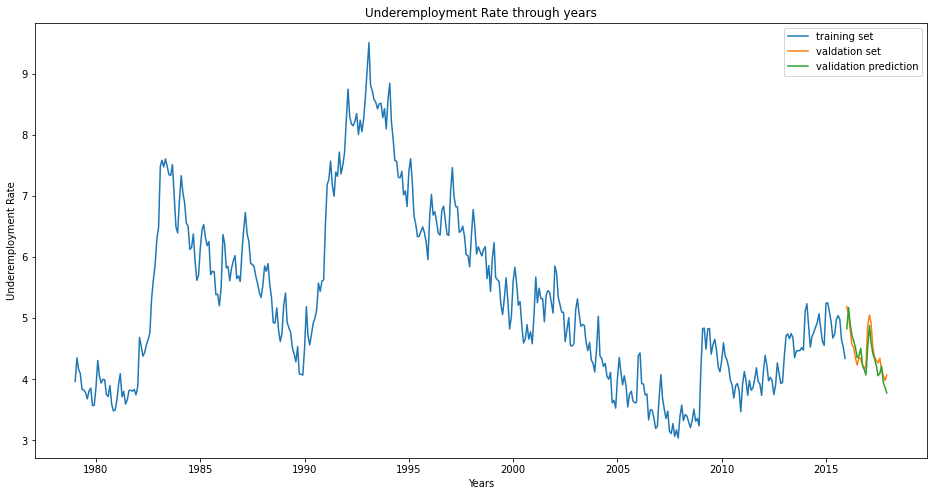

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_new, label='training set')
plt.plot(val, label = "valdation set")
plt.plot(hw_forecast_add, label = "validation prediction")
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.title("Underemployment Rate through years")
plt.legend()
plt.show()

# which is good, green constant with yellow almostly

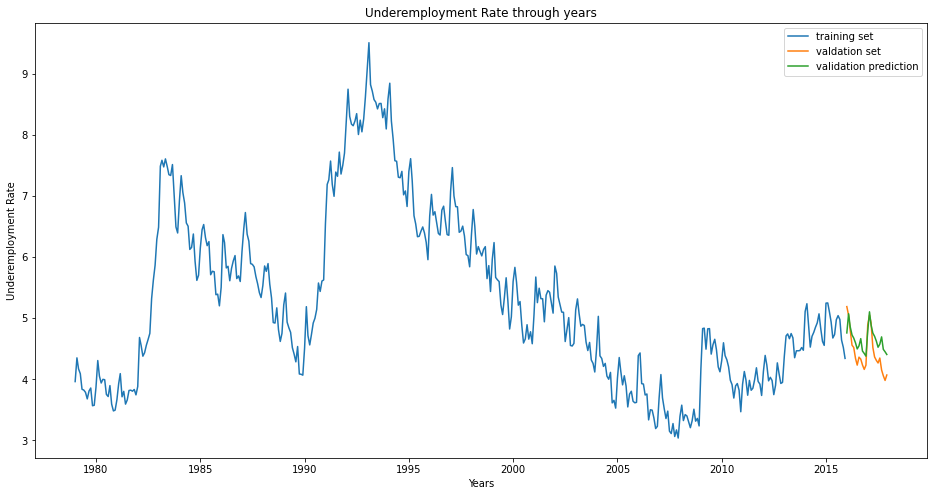

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_new, label='training set')
plt.plot(val, label = "valdation set")
plt.plot(hw_forecast_mul, label = "validation prediction")
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.title("Underemployment Rate through years")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
hw_mse_add = mse(val, hw_forecast_add)
hw_rmse_add = hw_mse_add ** 0.5
hw_rmse_add 

0.18146639296497324

In [ ]:
from sklearn.metrics import mean_squared_error as mse
hw_mse_mul = mse(val, hw_forecast_mul)
hw_rmse_mul = hw_mse_mul ** 0.5
hw_rmse_mul

0.27954568318846235

## SARIMA Model

### original data

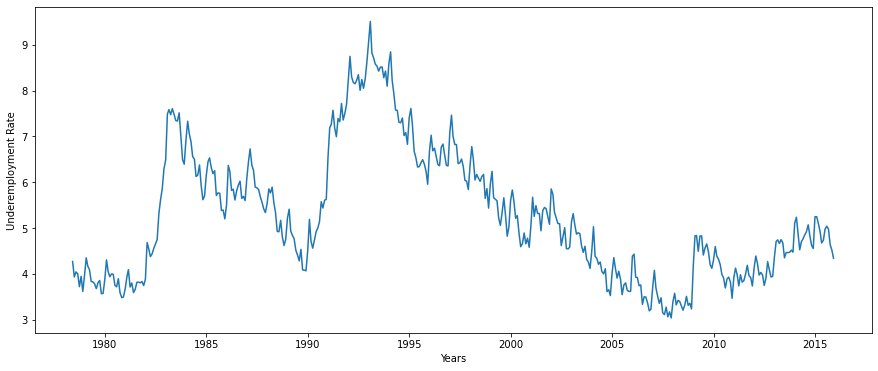

In [ ]:
#original data
plt.figure(figsize=(15,6))
plt.plot(train)
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.show()

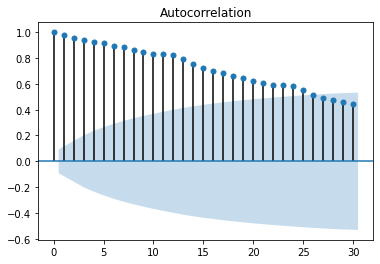

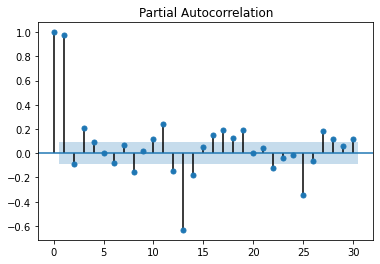

In [ ]:

# Sample ACF
smt.graphics.tsa.plot_acf(train, lags=30, alpha = 0.05)
plt.show()

# Sample PACF
smt.graphics.tsa.plot_pacf(train, lags=30, alpha = 0.05)
plt.show()

### log data

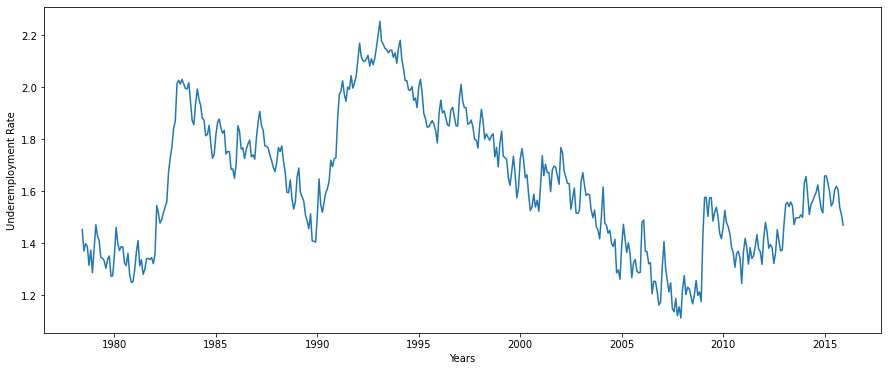

In [ ]:
#check log data
train_log = np.log(train)
plt.figure(figsize=(15,6))
plt.plot(train_log)
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.show()

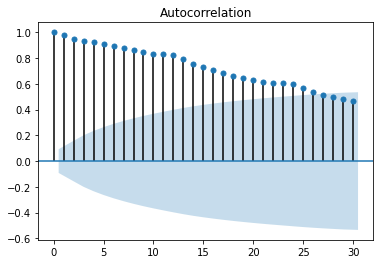

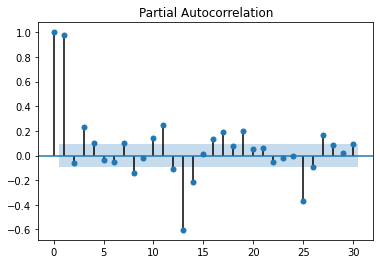

In [ ]:
# Sample ACF
smt.graphics.tsa.plot_acf(train_log, lags=30, alpha = 0.05)
plt.show()

# Sample PACF
smt.graphics.tsa.plot_pacf(train_log, lags=30, alpha = 0.05)
plt.show()

### difference

original data

In [ ]:
diff = pd.Series.diff(train)

diff.iloc[0]

nan

In [ ]:
# Discard the nan value
diff = diff.dropna()

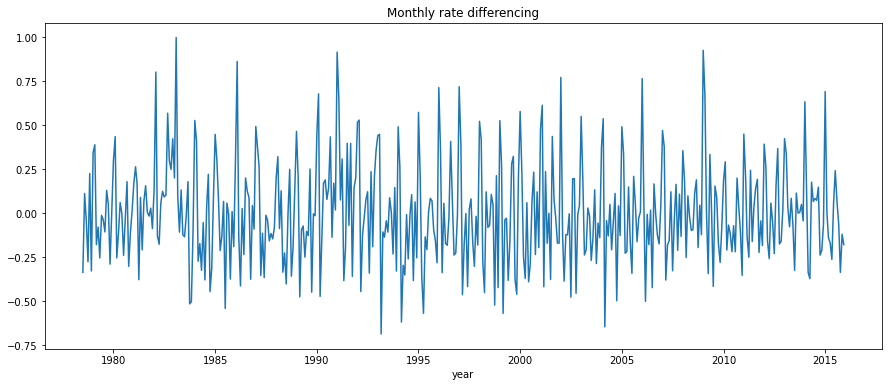

In [ ]:
# Plot the differenced data
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.xlabel('year')
plt.title('Monthly rate differencing')
plt.show()

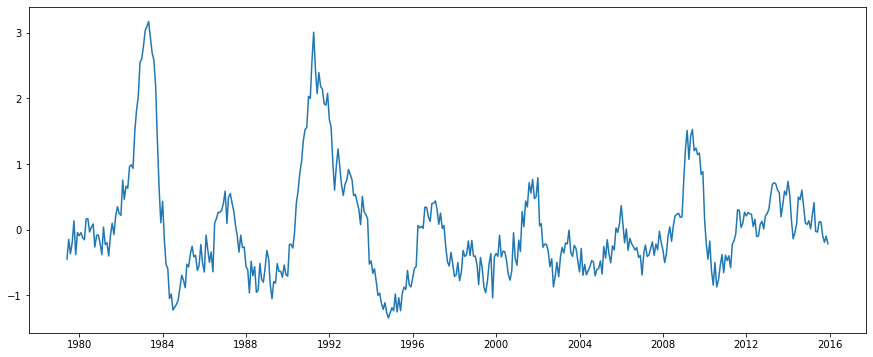

In [ ]:
diff_s =  train.diff(12)[12:]  
plt.figure(figsize=(15,6))
plt.plot(diff_s)
plt.show()

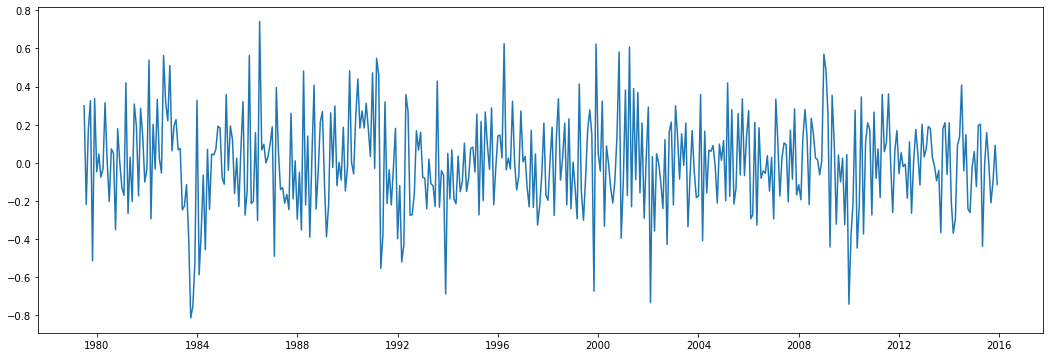

In [ ]:
diff_1 =diff_s.diff()[1:]  
plt.figure(figsize=(18,6))
plt.plot(diff_1)
plt.show()

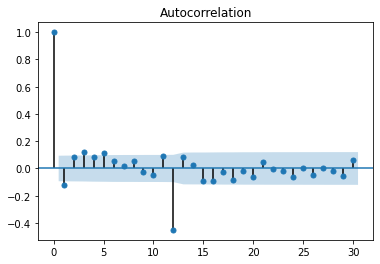

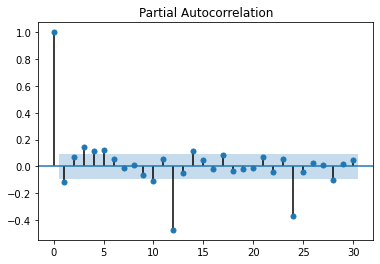

In [ ]:
# Sample ACF

smt.graphics.tsa.plot_acf(diff_1, lags=30, alpha = 0.05)    ##Q=1  q=1/3/5
plt.show()

# Sample PACF

smt.graphics.tsa.plot_pacf(diff_1, lags=30, alpha = 0.05)   #P=0  p=1/3/4/5
plt.show()

log data

In [ ]:
diff_log = pd.Series.diff(train_log)

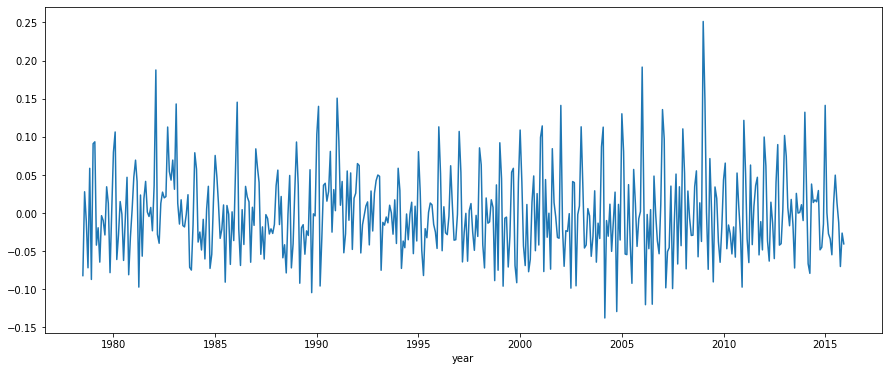

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(diff_log)
plt.xlabel('year')
plt.show()

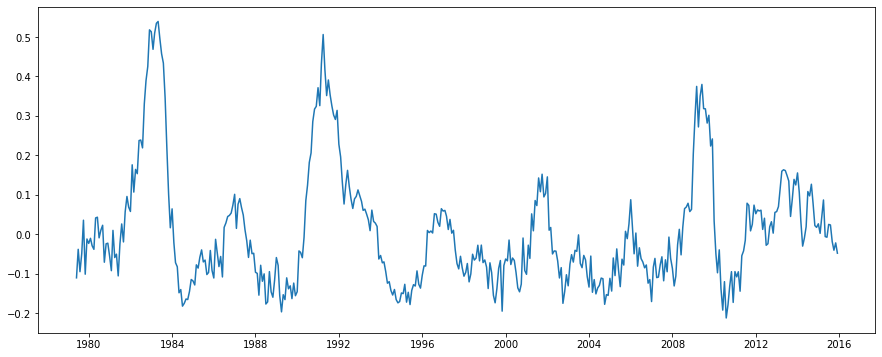

In [ ]:
diff_s_log =  train_log.diff(12)[12:]  
plt.figure(figsize=(15,6))
plt.plot(diff_s_log)
plt.show()

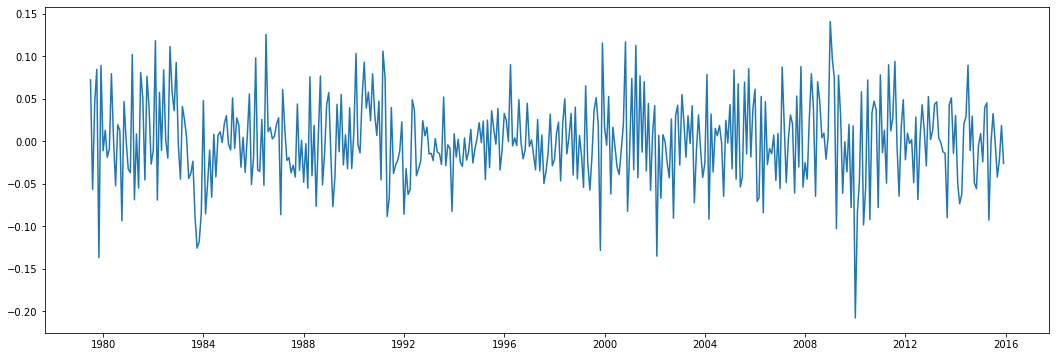

In [ ]:
diff_2 =diff_s_log.diff()[1:]  
plt.figure(figsize=(18,6))
plt.plot(diff_2)
plt.show()

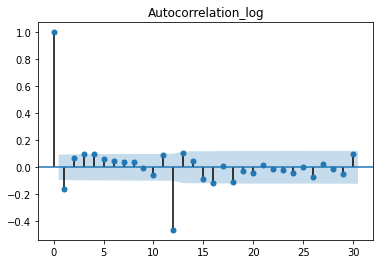

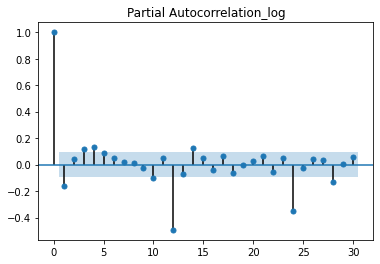

In [ ]:
# Sample ACF

smt.graphics.tsa.plot_acf(diff_2, lags=30, alpha = 0.05)    ##Q=1  q=1
plt.title('Autocorrelation_log')
plt.show()

# Sample PACF

smt.graphics.tsa.plot_pacf(diff_2, lags=30, alpha = 0.05)   #P=0  p=1/3/4
plt.title('Partial Autocorrelation_log')
plt.show()

### model fitting

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
SARIMA = [(1,1,1),(1,1,3),(1,1,5),(3,1,1),(3,1,3),(3,1,5),(4,1,1),(4,1,3),(4,1,5),(5,1,1),(5,1,3),(5,1,5)]     # ACF PACF的那些可能值
seasonal = [(0,1,1,12)]

In [ ]:

rmse = []

for i in SARIMA:
    for j in seasonal:
        try:
            model=SARIMAX(train_log, 
                    order=i,
                    seasonal_order=j,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
            model_fit =  np.exp(model.fit().forecast(24))
            error = mse(val, model_fit) ** 0.5
            rmse.append([i,j,error])
            
            
        except:
            continue

In [ ]:
rmse 

[[(1, 1, 1), (0, 1, 1, 12), 0.3513425774736233],
 [(1, 1, 3), (0, 1, 1, 12), 0.20016040227495582],
 [(1, 1, 5), (0, 1, 1, 12), 0.22624801636436775],
 [(3, 1, 1), (0, 1, 1, 12), 0.2187156710510787],
 [(3, 1, 3), (0, 1, 1, 12), 0.20355692429445307],
 [(3, 1, 5), (0, 1, 1, 12), 0.1865256835101567],
 [(4, 1, 1), (0, 1, 1, 12), 0.19780726700895745],
 [(4, 1, 3), (0, 1, 1, 12), 0.2025684849019596],
 [(4, 1, 5), (0, 1, 1, 12), 0.3109792159026937],
 [(5, 1, 1), (0, 1, 1, 12), 0.19406718960538333],
 [(5, 1, 3), (0, 1, 1, 12), 0.19212411719478906],
 [(5, 1, 5), (0, 1, 1, 12), 0.21006473861320066]]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMA315 = SARIMAX(train_log, 
                order = (3,1,5),                
                seasonal_order = (0,1,1,12),    
                enforce_stationarity = False,
                enforce_invertibility = False)

model_fit_315 = SARIMA315.fit()

fitted_SARIMA315 =  np.exp(model_fit_315.forecast(24))

In [ ]:
SARIMA315_mse = mse(val, fitted_SARIMA315)
SARIMA315_rmse = SARIMA315_mse ** 0.5
SARIMA315_rmse

0.16104752369117617

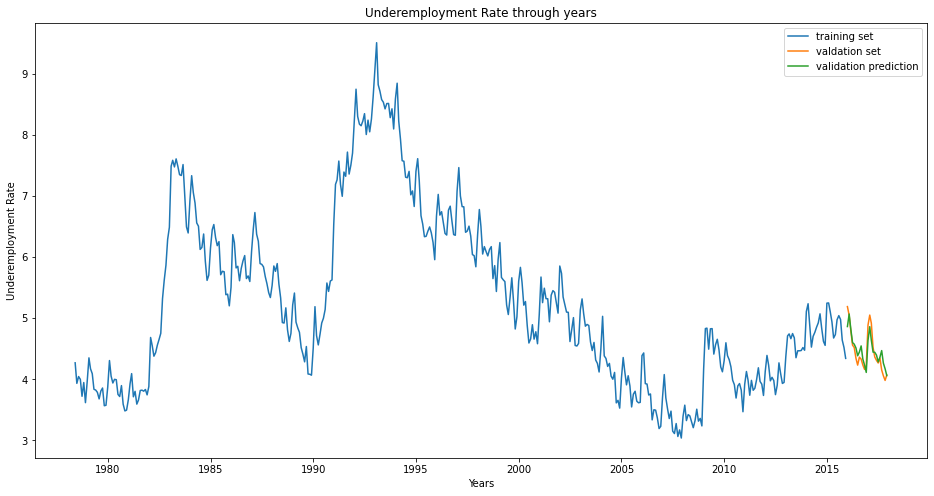

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train, label='training set')
plt.plot(val, label = "valdation set")
plt.plot(val.index,fitted_SARIMA315, label = "validation prediction")
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.title("Underemployment Rate through years")
plt.legend()
plt.show()

## Neural Network

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df, label_columns=None):

    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
  @property
  def train(self):
    return self.make_dataset(self.train_df)
  
  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    result = getattr(self, '_example', None)
    if result is None:
      result = next(iter(self.train))
      self._example = result
    return result
      
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset
WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='UER', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [Month]')

WindowGenerator.plot = plot

In [ ]:
def compile_and_fit(model, window, patience=2, max_epochs = 20, verbose=1):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='root_mean_squared_error',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  history = model.fit(window.train, epochs=max_epochs,
                      validation_data=window.val,
                      callbacks=[early_stopping], verbose=verbose)
  return history

In [ ]:
train_df = train_new.to_frame(name='UER')
val_df = val.to_frame(name='UER')
val_df = pd.concat([train_df.tail(24), val_df])
test_df = pd.concat([val_df, test])

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

wind = WindowGenerator(input_width=24, label_width=24, shift=24, 
                       train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['UER'])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(24 * 1,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([24, 1])
])

history = compile_and_fit(model, wind, max_epochs=100, verbose=0)

In [ ]:
val_performance = model.evaluate(wind.val, verbose=0)
data = val_df.head(24)['UER'].apply(np.array).to_numpy()
tensor = tf.convert_to_tensor(data, dtype=tf.float32)
tensor = tf.reshape(tensor, [1, 24, 1])
predicted = model.predict(tensor)
#print(data, predicted)
print("root_mean_squared_error: " + str(val_performance[1]))

1/1 [==============================] - 0s 465ms/step
root_mean_squared_error: 0.21054042875766754


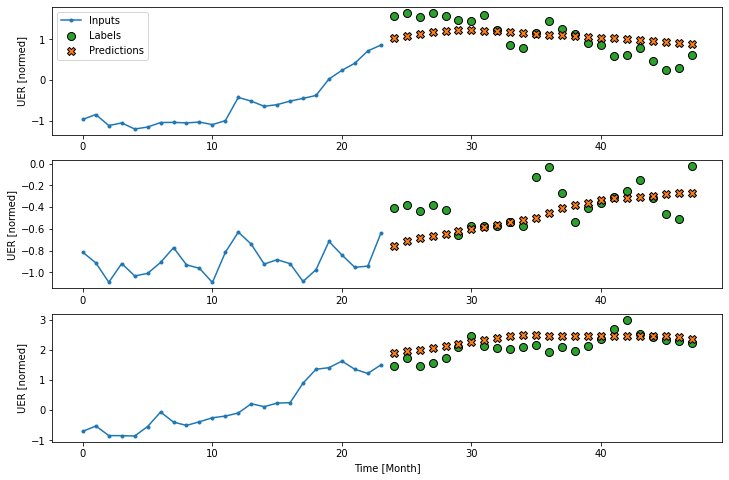

In [ ]:
wind.plot(model)

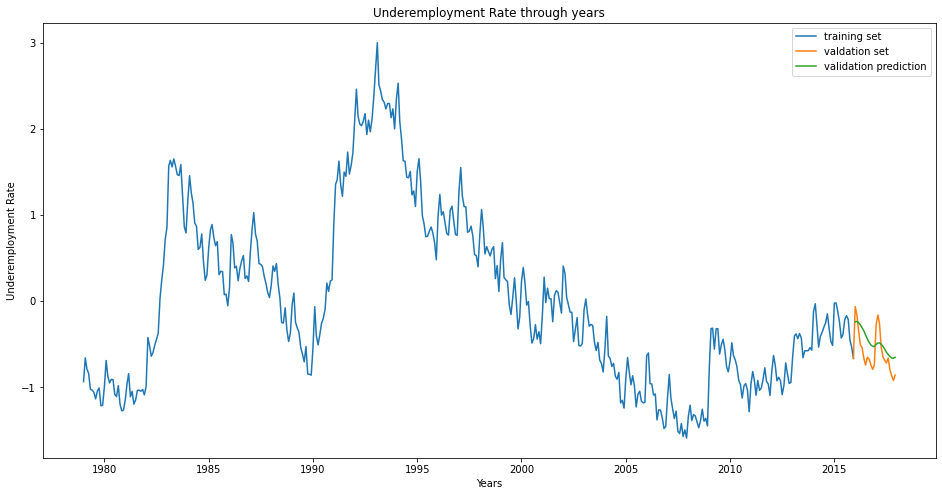

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_df, label='training set')
plt.plot(val_df.tail(25), label = "valdation set")
plt.plot(val_df.tail(24).index, predicted[0], label = "validation prediction")
plt.xlabel('Years')
plt.ylabel('Underemployment Rate')
plt.title("Underemployment Rate through years")
plt.legend()
plt.show()

# Comparison

In [ ]:
COLUMNS = ['RMSE']
INDEX = ['Decomposition_additive', 'Holtwinter_additive','Holtwinter_multiplication','SARIMA(3,1,5)(0,1,1,12)','Neural Network']

RMSE = [decomposition_rmse,hw_rmse_add,hw_rmse_mul,SARIMA315_rmse,'0.237509']

summary_table = pd.DataFrame(RMSE, index = INDEX, columns= COLUMNS)
summary_table

,RMSE
Decomposition_additive,2.795327
Holtwinter_additive,0.181466
Holtwinter_multiplication,0.279546
"SARIMA(5,1,1)(0,1,1,12)",0.161048
Neural Network,0.237509


# Test


In [ ]:

final_model = ExponentialSmoothing(train_un, seasonal_periods=12, trend='add', seasonal='add').fit()
final_forecast = final_model.forecast(24) 

In [ ]:
final_forecast

2018-01-01    4.526973
2018-02-01    4.877123
2018-03-01    4.623261
2018-04-01    4.450705
2018-05-01    4.393123
2018-06-01    4.295243
2018-07-01    4.153982
2018-08-01    4.216278
2018-09-01    4.337099
2018-10-01    4.102011
2018-11-01    4.045730
2018-12-01    3.979168
2019-01-01    4.472435
2019-02-01    4.822585
2019-03-01    4.568723
2019-04-01    4.396167
2019-05-01    4.338585
2019-06-01    4.240706
2019-07-01    4.099445
2019-08-01    4.161741
2019-09-01    4.282562
2019-10-01    4.047474
2019-11-01    3.991193
2019-12-01    3.924630
Freq: MS, dtype: float64

In [ ]:
test

,Underemployment Rate
Date,
2018-01-01,4.614745
2018-02-01,4.524650
2018-03-01,4.441512
2018-04-01,4.349381
2018-05-01,4.293985
2018-06-01,4.134292
2018-07-01,4.166539
2018-08-01,4.175848
2018-09-01,3.819349


In [ ]:
final_rmse = mse(test['Underemployment Rate'],final_forecast) **0.5

In [ ]:
final_rmse

0.31692162545536456